
--- Initial Training on MNIST ---
Epoch 1/20


I0000 00:00:1741897715.950789 1536498 service.cc:148] XLA service 0x1554100170c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741897715.950809 1536498 service.cc:156]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-03-13 16:28:35.989691: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741897716.126412 1536498 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-13 16:28:36.197003: W external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:868] Compiling 45 configs for 2 fusions on a single thread.
2025-03-13 16:28:36.210007: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, whi

108/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2804 - loss: 2.1959

I0000 00:00:1741897719.809913 1536498 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


909/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6806 - loss: 1.0730

2025-03-13 16:28:41.319619: W external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:868] Compiling 39 configs for 2 fusions on a single thread.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 1.0563

2025-03-13 16:28:43.596285: W external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:865] Compiling 20 configs for gemm_fusion_dot.108 on a single thread.
2025-03-13 16:28:45.456123: W external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:865] Compiling 16 configs for gemm_fusion_dot.108 on a single thread.


938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6859 - loss: 1.0557 - val_accuracy: 0.9631 - val_loss: 0.1202
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9574 - loss: 0.1434 - val_accuracy: 0.9767 - val_loss: 0.0737
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9695 - loss: 0.1034 - val_accuracy: 0.9811 - val_loss: 0.0576
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0796 - val_accuracy: 0.9863 - val_loss: 0.0469
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.9888 - val_loss: 0.0373
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0518 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9893 - val

2025-03-13 16:31:03.598405: W external/local_xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:865] Compiling 18 configs for gemm_fusion_dot.63 on a single thread.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


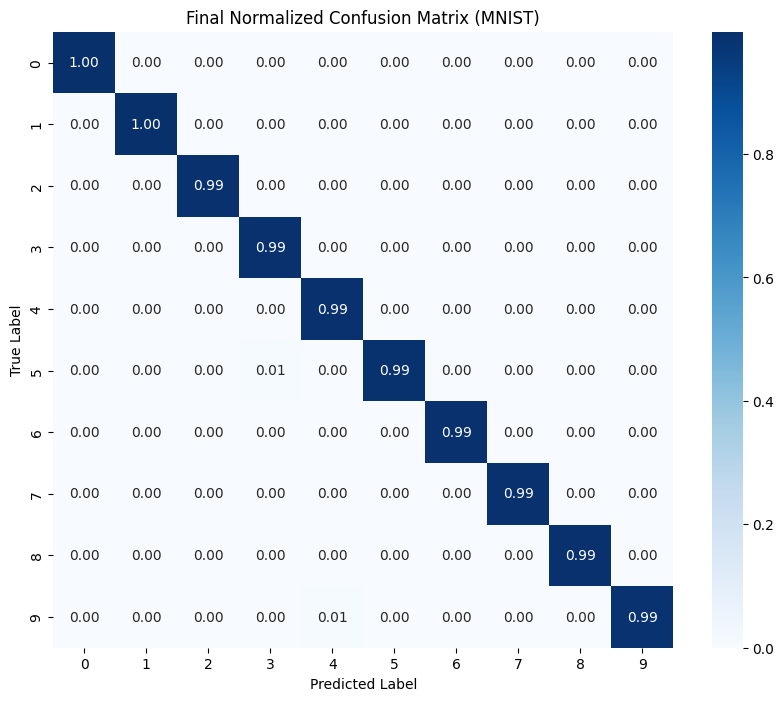

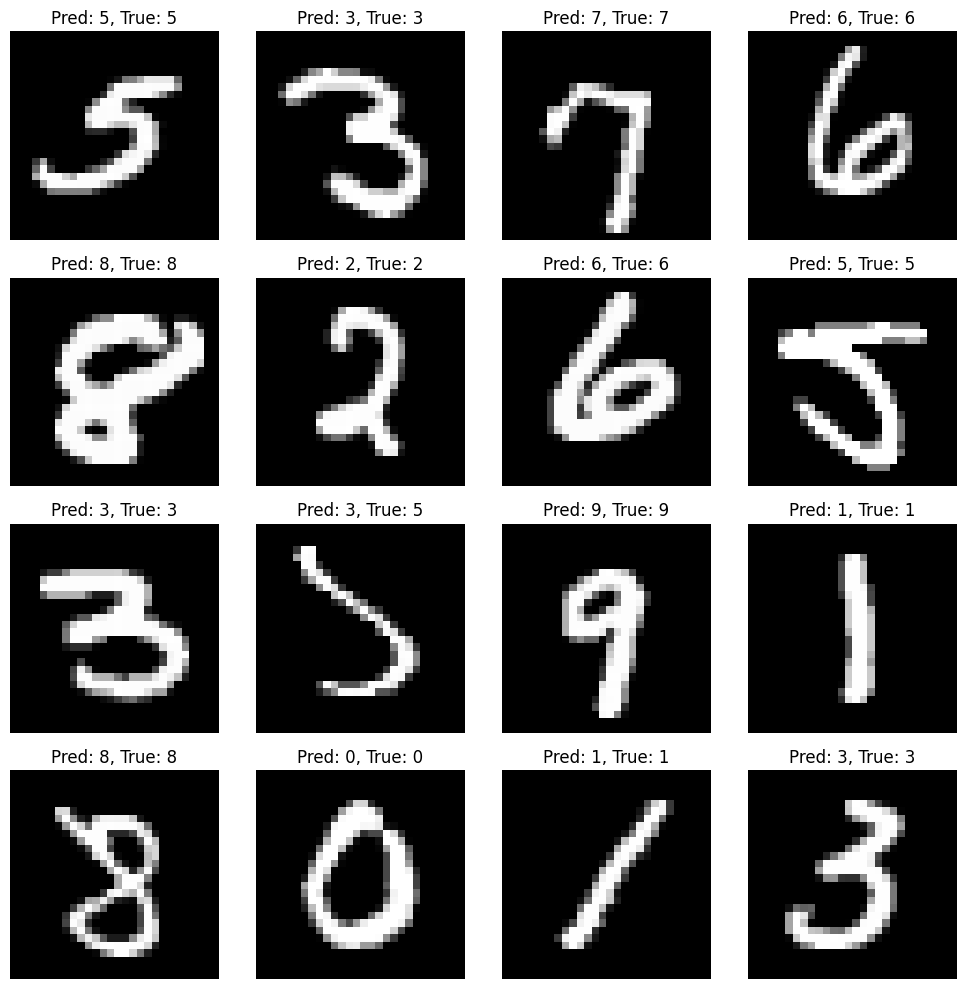

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

# -------------------------
# 🔹 Load MNIST Data
# -------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Reshape images for ConvNet (keep single-channel format)
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    # Normalize images
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # One-hot encode labels
    num_classes = 10
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

# -------------------------
# 🔹 Build a CNN Model for MNIST
# -------------------------
def build_model(num_classes):
    input_layer = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# -------------------------
# 🔹 Fine-Tune the Model
# -------------------------
def fine_tune_model(trained_model, x_train, y_train, x_test, y_test):
    # Learning rate decay
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=10000,
        decay_rate=0.9
    )
    optimizer = Adam(learning_rate=lr_schedule)

    trained_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    print("\n--- Fine-Tuning Model with MNIST ---")
    history_finetune = trained_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                         epochs=30, batch_size=64, verbose=1)
    return history_finetune

# -------------------------
# 🔹 Train Model and Evaluate
# -------------------------
def train_and_evaluate():
    x_train, y_train, x_test, y_test, num_classes = load_data()
    model = build_model(num_classes)

    print("\n--- Initial Training on MNIST ---")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

    # Fine-tune the model
    fine_tune_model(model, x_train, y_train, x_test, y_test)

    # Compute final confusion matrix
    final_predictions = np.argmax(model.predict(x_test), axis=1)
    final_true_labels = np.argmax(y_test, axis=1)
    final_cm = confusion_matrix(final_true_labels, final_predictions)

    return model, x_test, final_predictions, final_true_labels, final_cm

# -------------------------
# 🔹 Run Training & Fine-Tuning
# -------------------------
trained_model, test_images, test_preds, test_labels, final_cm = train_and_evaluate()

# -------------------------
# 🔹 Plot Normalized Confusion Matrix
# -------------------------
def plot_confusion_matrix(cm, labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Final Normalized Confusion Matrix (MNIST)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(final_cm, list(range(10)))

# -------------------------
# 🔹 Show Some Sample Images with Predictions
# -------------------------
def plot_sample_predictions(images, labels, preds, num_samples=16):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[idx].squeeze(), cmap="gray")
        plt.title(f"Pred: {preds[idx]}, True: {labels[idx]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

plot_sample_predictions(test_images, test_labels, test_preds)
